# Проектная работа. Определение перспективного тарифа для телеком компании "Мегалайн"

#### Цель работы: проанализировать поведение клиентов, провести исследование по выборке пользователей для определения перспективного с точки зрения выручки тарифа и составить рекомендации заказчику исследования. На старте имеется 5 датасетов с информацией о пользователях, предлагаемых тарифах, звонках, использовании мобильного интернета и отправленных смс-сообщениях. 



## Содержание


   1. [Импортирование библиотек и загрузка данных;](#step1)
   2. [Предобработка и приведение данных к нужным типам;](#step2)
   3. [Анализ полученных данных;](#step3)
   4. [Проверка выдвинутых гипотез;](#step4)
   5. [Общий вывод и рекомендации заказчику исследования.](#step5)

#### Описание данных

Таблица users (информация о пользователях):

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана

Таблица calls (информация о звонках):

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Шаг 1. Импортирование библиотек и загрузка данных <a name="step1"></a>

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math as mt

In [2]:
# Загрузка датасетов и изучение их свойств
filepath1 = r'C:\Users\Torberg\Documents\Yandex Projects\Project3\calls.csv'
filepath2 = r'C:\Users\Torberg\Documents\Yandex Projects\Project3\internet.csv'
filepath3 = r'C:\Users\Torberg\Documents\Yandex Projects\Project3\messages.csv'
filepath4 = r'C:\Users\Torberg\Documents\Yandex Projects\Project3\tariffs.csv'
filepath5 = r'C:\Users\Torberg\Documents\Yandex Projects\Project3\users.csv'

calls_data = pd.read_csv(filepath1)
internet_data = pd.read_csv(filepath2)
messages_data = pd.read_csv(filepath3)
tariffs_data = pd.read_csv(filepath4)
users_data = pd.read_csv(filepath5)

display(calls_data.sample(5))
calls_data.info()
print('**********************************************')
display(internet_data.sample(5))
internet_data.info()
print('**********************************************')
display(messages_data.sample(5))
messages_data.info()
print('**********************************************')
display(tariffs_data)
tariffs_data.info()
print('**********************************************')
display(users_data.sample(5))
users_data.info()

,id,call_date,duration,user_id
157212,1389_77,2018-07-30,8.34,1389
90003,1225_263,2018-12-17,1.27,1225
151975,1379_210,2018-10-13,13.37,1379
40129,1099_502,2018-05-04,20.19,1099
82877,1207_24,2018-08-29,0.75,1207


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
**********************************************


,Unnamed: 0,id,mb_used,session_date,user_id
30147,30147,1105_215,571.20,2018-12-26,1105
117247,117247,1394_205,542.64,2018-06-18,1394
31627,31627,1110_221,0.00,2018-10-09,1110
66854,66854,1227_451,170.22,2018-02-17,1227
13045,13045,1045_221,0.00,2018-12-13,1045


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
**********************************************


,id,message_date,user_id
85287,1356_304,2018-04-27,1356
6372,1028_27,2018-11-19,1028
56084,1249_18,2018-11-26,1249
24828,1104_20,2018-04-21,1104
34890,1150_70,2018-09-14,1150


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
**********************************************


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
**********************************************


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
110,1110,26,NaN,Петрозаводск,Матвей,Александрович,2018-05-06,smart
272,1272,61,NaN,Пенза,Мстислав,Демьянов,2018-08-29,ultra
162,1162,63,NaN,Москва,Марта,Минаева,2018-10-09,smart
451,1451,58,NaN,Набережные Челны,Виктория,Завьялова,2018-08-27,smart
323,1323,67,NaN,Челябинск,Эсмеральда,Носкова,2018-08-02,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Вывод

Загружено 5 датасетов и изучены их свойства методом .info(). 

В данных обнаружены следующие проблемы: 1) Все столбцы с датами имеют формат object; 2) В датасете internet_data обнаружено дублирование столбца с id пользователя; 3) в датасете users_data обнаружены пропуски. С датами удобнее работать в формате datetime[64], дублиррование просто будет мешать, особенно при объединении таблиц, а необработанные пропуски исказят данные и результат такого "исследования" будет далек от истины.

## Шаг 2. Предобработка и приведение данных к нужным типам <a name="step2"></a>

In [3]:
#Поиск пропусков в исходных данных 
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format = '%Y-%m-%dT')

def nans_counter(column, data):
    print('Количество пропусков в столбце', column, ':', data[column].isna().sum())

for column in calls_data:
    nans_counter(column, calls_data)

display(calls_data)
calls_data.info()

# Функция для округления данных в большую сторону
def round_func(row):        
    return mt.ceil(row)


calls_data['duration'] = calls_data['duration'].apply(round_func)
display(calls_data.sample(5))

Количество пропусков в столбце id : 0
Количество пропусков в столбце call_date : 0
Количество пропусков в столбце duration : 0
Количество пропусков в столбце user_id : 0


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
33341,1081_586,2018-12-18,9,1081
104822,1269_48,2018-09-25,0,1269
190291,1468_262,2018-04-07,1,1468
28613,1071_268,2018-04-02,7,1071
161376,1396_77,2018-06-17,4,1396


In [4]:
# Удаление лишнего столбца и поиск пропусков в датасете internet_data
internet_data = internet_data.drop(internet_data.columns[0], axis = 'columns')
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format = '%Y-%m-%dT')

for column in internet_data:
    nans_counter(column, internet_data)

internet_data['mb_used'] = internet_data['mb_used'].apply(round_func)
display(internet_data)
internet_data.info()

Количество пропусков в столбце id : 0
Количество пропусков в столбце mb_used : 0
Количество пропусков в столбце session_date : 0
Количество пропусков в столбце user_id : 0


,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
...,...,...,...,...
149391,1499_152,319,2018-10-03,1499
149392,1499_153,491,2018-12-14,1499
149393,1499_154,0,2018-10-27,1499
149394,1499_155,1247,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  int64         
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB


In [5]:
# Поиск пропусков в датасете messages_data
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format = '%Y-%m-%dT')
for column in messages_data:
    nans_counter(column, messages_data)

messages_data.info()

Количество пропусков в столбце id : 0
Количество пропусков в столбце message_date : 0
Количество пропусков в столбце user_id : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [6]:
# Поиск пропусков в датасете tariffs_data
for column in tariffs_data:
    nans_counter(column, tariffs_data)

Количество пропусков в столбце messages_included : 0
Количество пропусков в столбце mb_per_month_included : 0
Количество пропусков в столбце minutes_included : 0
Количество пропусков в столбце rub_monthly_fee : 0
Количество пропусков в столбце rub_per_gb : 0
Количество пропусков в столбце rub_per_message : 0
Количество пропусков в столбце rub_per_minute : 0
Количество пропусков в столбце tariff_name : 0


In [7]:
#Заполнение пропусков
users_data['tariff_name'] = users_data['tariff']
users_data = users_data.drop(users_data.columns[7], axis = 'columns')
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format = '%Y-%m-%dT')
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format = '%Y-%m-%dT').fillna(calls_data['call_date'].max())
for column in users_data:
    nans_counter(column, users_data)

display(users_data)
print(calls_data['call_date'].max())
print(internet_data['session_date'].max())
print(messages_data['message_date'].max())
print(calls_data['call_date'].min())
print('****************************************************************')
users_data.info()

Количество пропусков в столбце user_id : 0
Количество пропусков в столбце age : 0
Количество пропусков в столбце churn_date : 0
Количество пропусков в столбце city : 0
Количество пропусков в столбце first_name : 0
Количество пропусков в столбце last_name : 0
Количество пропусков в столбце reg_date : 0
Количество пропусков в столбце tariff_name : 0


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2018-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,2018-12-31,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,2018-12-31,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,2018-12-31,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


2018-12-31 00:00:00
2018-12-31 00:00:00
2018-12-31 00:00:00
2018-01-01 00:00:00
****************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   age          500 non-null    int64         
 2   churn_date   500 non-null    datetime64[ns]
 3   city         500 non-null    object        
 4   first_name   500 non-null    object        
 5   last_name    500 non-null    object        
 6   reg_date     500 non-null    datetime64[ns]
 7   tariff_name  500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [8]:
#Создание столбца "month"  и сводных таблиц для дальнейшего расчета параметров помесячно
calls_data['month'] = calls_data['call_date'].dt.month
calls_data_pivot = calls_data.pivot_table(index= ['user_id', 'month'], values= 'duration', aggfunc= ['sum', 'count'])
calls_data_pivot.columns = ['duration', 'calls_quantity']
display(calls_data_pivot.head())

internet_data['month'] = internet_data['session_date'].dt.month
internet_data_pivot = internet_data.pivot_table(index= ['user_id', 'month'], values= 'mb_used', aggfunc= 'sum')
display(internet_data_pivot.head())

messages_data['month'] = messages_data['message_date'].dt.month

messages_data_pivot = messages_data.pivot_table(index= ['user_id', 'month'], values= 'message_date', aggfunc= 'count')
messages_data_pivot.columns = ['messages_quantity']
display(messages_data_pivot.head())

duration  calls_quantity
user_id month                          
1000    5           159              22
        6           172              43
        7           340              47
        8           408              52
        9           466              58

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581

messages_quantity
user_id month                   
1000    5                     22
        6                     60
        7                     75
        8                     81
        9                     57

In [9]:
#Объединение отредактированных датасетов
final_data1 = internet_data_pivot.join(calls_data_pivot, on= ['user_id', 'month'])

final_data2 = final_data1.join(messages_data_pivot, on = ['user_id', 'month']).reset_index()

final_data3 = users_data.merge(final_data2, on= ['user_id'], how= 'outer')

final_data = final_data3.merge(tariffs_data, on= ['tariff_name'], how= 'left')
final_data = final_data.fillna(0)
display(final_data.sample(5))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,mb_used,duration,calls_quantity,messages_quantity,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
1076,1171,47,2018-12-31,Москва,Каролина,Иванова,2018-03-20,smart,3.0,5964.0,158.0,24.0,23.0,50,15360,500,550,200,3,3
1387,1217,42,2018-12-31,Ульяновск,Ермолай,Сазонов,2018-02-23,smart,11.0,13075.0,495.0,66.0,58.0,50,15360,500,550,200,3,3
1771,1281,62,2018-12-31,Нижний Новгород,Сара,Зимина,2018-06-09,ultra,10.0,18461.0,439.0,62.0,79.0,1000,30720,3000,1950,150,1,1
650,1102,28,2018-12-31,Москва,Марта,Королькова,2018-06-16,smart,8.0,19231.0,423.0,68.0,28.0,50,15360,500,550,200,3,3
2514,1394,47,2018-12-31,Орёл,Ксения,Жукова,2018-01-12,smart,3.0,6642.0,463.0,68.0,5.0,50,15360,500,550,200,3,3


In [10]:
#Расчет помесячной выручки для каждого пользователя
def proceeds_counter(row):
    proceed = row['rub_monthly_fee']                                                                  #абонентская плата                       
    formula1 = (int(row['duration']) - row['minutes_included']) * row['rub_per_minute']               #стоимость звонков при превышении лимита
    formula2 = (mt.ceil(row['mb_used']/1024) - row['mb_per_month_included']/1024) * row['rub_per_gb'] #стоимость трафика при превышении лимита
    formula3 = (int(row['messages_quantity']) - row['messages_included']) * row['rub_per_message']    #стоимость смс-сообщений при превышении лимита
    if formula1 < 0:
        calls_proceed = 0 
    else:
        calls_proceed = formula1
    if formula2 < 0:
        internet_proceed = 0
    else:
        internet_proceed = formula2 
    if formula3 < 0:
        messages_proceed = 0
    else:
        messages_proceed = formula3
    return proceed + calls_proceed + internet_proceed + messages_proceed


final_data['proceed'] = final_data.apply(proceeds_counter, axis = 1)
final_data['proceed'] = final_data['proceed'].astype('int')
display(final_data.sample(5))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,mb_used,...,calls_quantity,messages_quantity,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,proceed
587,1093,73,2018-12-31,Санкт-Петербург,Вероника,Лапина,2018-06-29,smart,8.0,18433.0,...,109.0,69.0,50,15360,500,550,200,3,3,2475
1105,1174,29,2018-12-31,Санкт-Петербург,Лолита,Розанова,2018-02-17,smart,6.0,19343.0,...,84.0,58.0,50,15360,500,550,200,3,3,1464
15,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,11.0,18610.0,...,32.0,16.0,50,15360,500,550,200,3,3,1350
2212,1352,53,2018-12-31,Рязань,Кристина,Румянцева,2018-04-17,ultra,7.0,17920.0,...,118.0,3.0,1000,30720,3000,1950,150,1,1,1950
2298,1364,74,2018-12-31,Екатеринбург,Мстислав,Алексеенко,2018-08-29,ultra,11.0,23179.0,...,145.0,109.0,1000,30720,3000,1950,150,1,1,1950


## Вывод

Произведена подготовка и обработка данных в следующем порядке:
- 1) Во всех пяти датасетах столбцы с датой и временем имеют формат object. Данные приведены к формату datetime64.
- 2) В датасете internet_data был обнаружен столбец Index_0, который дублировал индексы таблицы, и удален методом .drop().
- 3) Посчитаны и обработаны пропуски в данных - 462 пропуска в столбце дата прекращения пользования тарифом датасета users_data. Пропуск означает, что на момент выгрузки данных пользователь продолжает пользоваться указанным тарифом(то есть из 500 пользователей отказалось от текущего тарифа 38 пользователей).  Среди дат в датафреймах calls, internet, messages находим максимальное значение даты - оно и будет датой выгрузки данных. Эту дату - 2018.12.31 используем для заполнения пропусков в датафрейме users_data.
- 4) Данные датасетов calls_data, internet_data и messages_data сгруппированы методом pivot_table() для подсчета длительности звонков, количества использованного интернет трафика и количества отправленных сообщений каждым пользователем за месяц. Затем эти данные объединены с данными о параметрах тарифов и пользователях в общий датафрейм final_data.
- 5) Посчитана и добавлена в таблицу выручка, полученная компанией "Мегалайн" за каждый месяц пользования услугами.

## Шаг 3. Анализ полученных данных <a name="step3"></a>

In [11]:
# Разбиваем полученный датасет потарифно
smart_query = final_data.query('tariff_name == "smart"')
ultra_query = final_data.query('tariff_name == "ultra"')

#Поиск средних значений, дисперсии и стандартного отклонения для тарифа Smart

def mvs_counter(column, data):                                                     #mvs - mean/variance/standart deviation
    print('Среднее значение совокупности', column, 'равно:', data[column].mean())
    print('Дисперсия совокупности', column, 'равна:', np.var(data[column], ddof = 1))
    print('Стандартное отклонение совокупности', column, 'равно:', mt.sqrt(np.var(data[column], ddof = 1)))

for column in smart_query.loc[:, ['duration', 'mb_used', 'messages_quantity', 'proceed']]:
    mvs_counter(column, smart_query)

Среднее значение совокупности duration равно: 417.9125168236877
Дисперсия совокупности duration равна: 36236.951499452654
Стандартное отклонение совокупности duration равно: 190.36005752114244
Среднее значение совокупности mb_used равно: 16229.188425302826
Дисперсия совокупности mb_used равна: 34545911.12695754
Стандартное отклонение совокупности mb_used равно: 5877.576977544194
Среднее значение совокупности messages_quantity равно: 33.3835800807537
Дисперсия совокупности messages_quantity равна: 796.8424771234038
Стандартное отклонение совокупности messages_quantity равно: 28.2283984158401
Среднее значение совокупности proceed равно: 1294.6393001345896
Дисперсия совокупности proceed равна: 673931.3213632498
Стандартное отклонение совокупности proceed равно: 820.9332015232724


In [12]:
#Поиск средних значений, дисперсии и стандартного отклонения для тарифа Ultra
for column in ultra_query.loc[:, ['duration', 'mb_used', 'messages_quantity', 'proceed']]:
    mvs_counter(column, ultra_query)

Среднее значение совокупности duration равно: 528.6653019447288
Дисперсия совокупности duration равна: 101250.98314931958
Стандартное отклонение совокупности duration равно: 318.1995964003091
Среднее значение совокупности mb_used равно: 19646.466734902762
Дисперсия совокупности mb_used равна: 99633054.31472228
Стандартное отклонение совокупности mb_used равно: 9981.635853642543
Среднее значение совокупности messages_quantity равно: 49.48413510747185
Дисперсия совокупности messages_quantity равна: 2302.2356599325467
Стандартное отклонение совокупности messages_quantity равно: 47.981617937836845
Среднее значение совокупности proceed равно: 2072.057318321392
Дисперсия совокупности proceed равна: 144546.2753997685
Стандартное отклонение совокупности proceed равно: 380.1924189141184


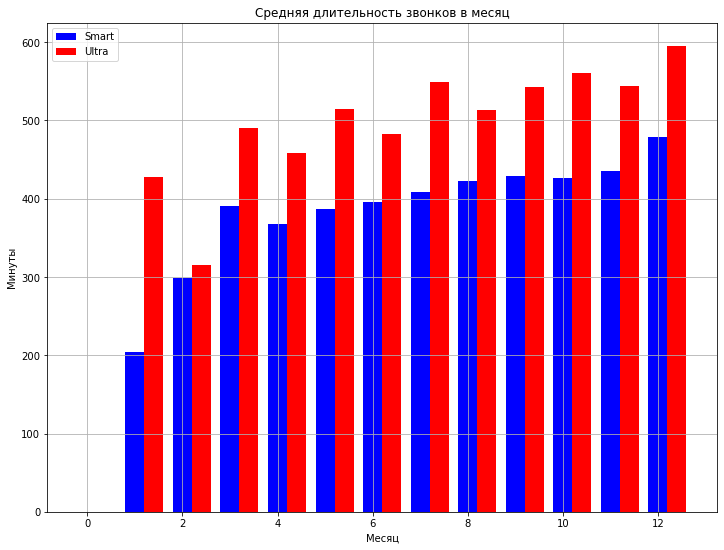

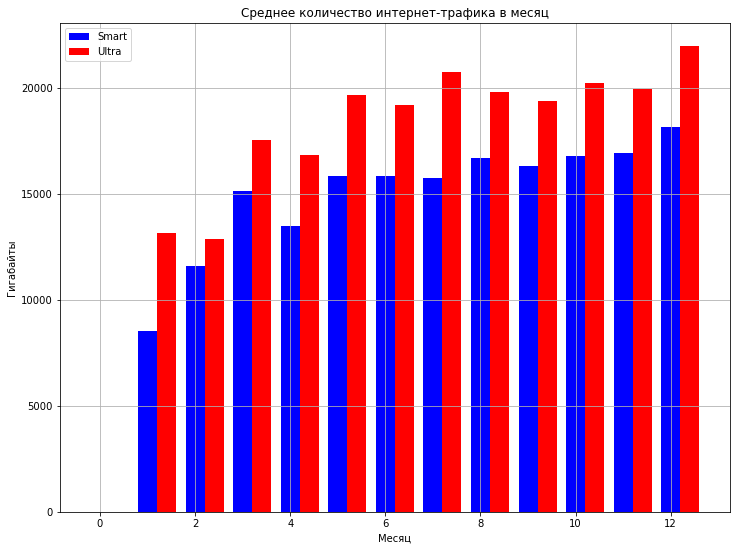

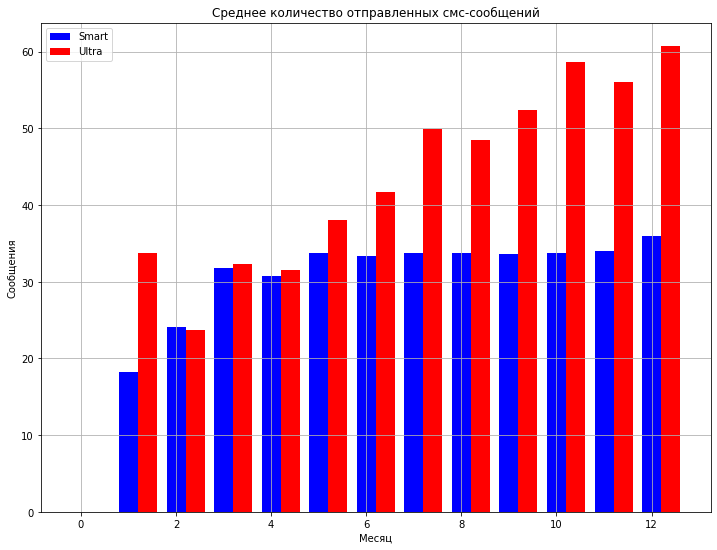

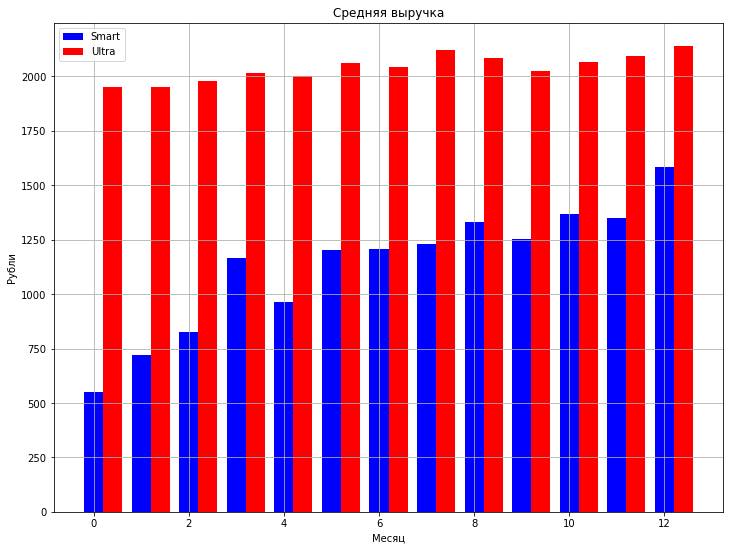

In [13]:
#Создание сводных таблиц для работы с интересующими данными и их визуализация
smart_month_grouped = smart_query.pivot_table(index = 'month', values = ['duration', 'mb_used', 'messages_quantity', 'proceed'], aggfunc = 'mean').reset_index()
ultra_month_grouped = ultra_query.pivot_table(index = 'month', values = ['duration', 'mb_used', 'messages_quantity', 'proceed'], aggfunc = 'mean').reset_index()
width = 0.4
h_columns = ['duration', 'mb_used', 'messages_quantity', 'proceed']
h_ylabels = ['Минуты', 'Гигабайты', 'Сообщения', 'Рубли']
h_titles = ['Средняя длительность звонков в месяц', 'Среднее количество интернет-трафика в месяц', 'Среднее количество отправленных смс-сообщений', 'Средняя выручка']
             
for i in range(4):
    plt.figure(figsize = (12,9))
    plt.bar(smart_month_grouped['month'], smart_month_grouped[h_columns[i]], width, color = 'b', label = 'Smart')
    plt.bar(ultra_month_grouped['month'] + width, ultra_month_grouped[h_columns[i]], width, color = 'r', label = 'Ultra')
    plt.title(h_titles[i])
    plt.xlabel('Месяц')
    plt.ylabel(h_ylabels[i])
    plt.grid(True)
    plt.legend()
    plt.show()

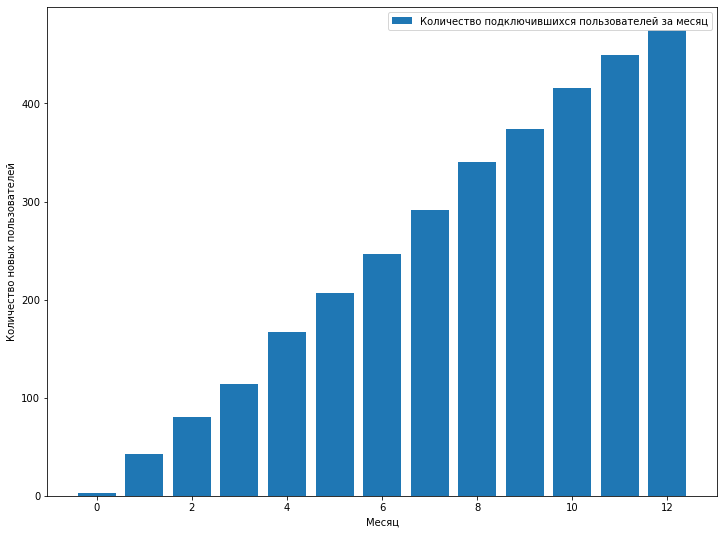

In [14]:
#Создадим еще одну таблицу с данными о количестве присоединившихся пользователей по месяцам
users_pivot = final_data.pivot_table(index= 'month', values= 'user_id', aggfunc= 'count').reset_index()
plt.figure(figsize = (12, 9))
plt.bar(users_pivot['month'], users_pivot['user_id'], label = 'Количество подключившихся пользователей за месяц')
plt.xlabel('Месяц')
plt.ylabel('Количество новых пользователей')
plt.legend()
plt.show()

In [15]:
#найдем пользователей с нулевым месяцем 
display(final_data.query('month == 0'))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,mb_used,...,calls_quantity,messages_quantity,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,proceed
827,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,0.0,0.0,...,0.0,0.0,1000,30720,3000,1950,150,1,1,1950
1723,1273,46,2018-12-31,Курган,Рэм,Корнилов,2018-05-15,ultra,0.0,0.0,...,0.0,0.0,1000,30720,3000,1950,150,1,1,1950
2328,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,0.0,0.0,...,0.0,0.0,50,15360,500,550,200,3,3,550


3 значения в точке 0 возникли из-за 3 новых пользователей подключивших мобильную связь к концу 2018 года и по факту не успели ей воспользоваться

## Вывод

Для анализа полученных данных было выделено 2 среза из общего датасета - данные о пользователях тарифа Smart и о пользователях тарифа Ультра. Чтобы ответить на поставленные вопросы построены гистограммы для средних значений значений длительности звонков, использованного интернет трафика и количества отправленных сообщений для каждого месяца пользования. 
* Для пользователей тарифа Smart в среднем в месяц требуется:
    1. 418 минут минут разговора;
    2. 16 гигабайт интернет-трафика;
    3. 34 смс-сообщения.
* Для пользователей тарифа Ultra в среднем в месяц требуется:
    1. 529 минут разговора;
    2. 20 гигабайт интернет-трафика;
    3. 50 смс сообщений.

Распределение случайных величин "средняя длительность звонков в месяц", "среднее количество интернет-трафика в месяц", "среднее количество отправленных смс-сообщений" имеют равномерный характер с небольшим перекосом в начале года (январь, февраль, март, апрель). С каждым месяцем количество пользователей увеличивается, и поэтому гистограммы случайных величин выравниваются около среднего значения. 

Также для указанных совокупностей вычислены такие характеристики как стандартное дисперсия(s^2) и стандартное отклонение (s). Дисперсия, простыми словами - это мера разброса случайной величины вокруг среднего значения. Единицы измерения дисперии равны единицами измерения среднего значения возведённого в квадрат, поэтому удобнее пользоваться стандартным отклонением, которое вычисляется извлечением квадратного корня из дисперсии. Другими словами с большой долей вероятности значение случайной величины окажется в промежутке (mu - s, mu + s), где mu - среднее значение величины, s - стандартное отклонение.

Применяя к данному исследованию получим:

Для тарифа Smart:

    1. Длительность звонков - интервал имеет следующие значения (227, 609). Предельное значение установленное на тарифе - 500 минут;
    2. Интернет-трафик - интервал (10, 22). Предельное значение установленное на тарифе - 15 Гбайт; 
    3. Смс-сообщения - интервал (5, 63). Предельное значение установленное на тарифе - 50 сообщений;
    
Для тарифа Ultra: 

    1. Длительность звонков - интерввл (210, 848). Предельное значение установленное на тарифе - 3000 минут;
    2. Интернет-трафик - интервал (10, 30). Предельное значение установленное на тарифе - 30 Гбайт;
    3. Смс-сообщения - интервал (2, 98). Предельное значение установленное на тарифе - 1000 сообщений.
    
Сравнивая полученные данные с параметрами тарифов можно предположить, что пользователи тарифа Smart с большей вероятностью превысят "бесплатный лимит", в отличие от пользователей Ultra. Абонентская плата за тариф Ultra существенно выше (1950 против 550), она вносит основной вклад в выручку , что хорошо видно на гистограмме(значение абонентской платы близко к значению среднего - 2072 рубля в месяц). Это наблюдение позволяет сделать вывод, что тариф Ultra является более выгодным для компании, и в рекламной кампании стоит сделать упор на него. </font>

## Шаг 4. Проверка выдвинутых гипотез <a name="step4"></a>

### 1) Нулевая гипотеза: средняя выручка тарифов "Smart" и "Ultra" отличается

In [16]:
#Альтернативная гипотеза: средняя выручка тарифов "smart" и "ultra" равны
sample1 = smart_query['proceed']

sample2 = ultra_query['proceed']

print(np.var(sample1, ddof = 1))  #Проверка равнства дисперсии проверяемых совокупностей
print(np.var(sample2, ddof = 1))  # для определения параметра equal_var

alpha = 0.05

results = st.ttest_ind(sample1, sample2, equal_var = False)
print('*********************************')
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


673931.3213632498
144546.2753997685
*********************************
p-значение: 1.2190212555992077e-245
Отвергаем нулевую гипотезу


## Вывод

Для проверки "нулевой" гипотезы о том, что средняя выручка пользователей двух тарифов различается, выдвинута альтернативная гипотеза о том, что эти средние выручки равны. Возможность отвергнуть альтернативную гипотезу проверялась с помощью t-теста. Сначала проверено предположение о равенстве дисперсий совокупностей для которых выполняется t-test. По результатам подсчета принято решение использовать t-test Уэлча(параметр equal_var = False). Результат позволяет отвергнуть альтернативную гипотезу о равенстве средних выручек тарифов мобильной связи, что, в свою очередь, не позволяет отвергнуть "нулевую" гипотезу об отличии этих выручек. Полученное значение р-value говорит о том, что вероятность равенства средней выручки двух тарифов ничтожно мала (достаточно взглянуть даже на абонентскую плату - для Ultra почти в 4 раза больше, то есть абонентам Smart'а нужно очень сильно постараться, чтобы догнать Ultra :))) 

### 2) Нулевая гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей других регионов

In [17]:
#Альтернативная гипотеза: средняя выручка пользователей из Москвы равна выручке пользователей других регионов
moscow = final_data[final_data['city'] == 'Москва']['proceed']
other_cities = final_data[final_data['city'] != 'Москва']['proceed']

sample3 = moscow

sample4 = other_cities

print(np.var(sample3, ddof = 1))  #Проверка равнства дисперсии проверяемых совокупностей
print(np.var(sample4, ddof = 1))  # для определения параметра equal_var

alpha = 0.05

results = st.ttest_ind(sample3, sample4, equal_var = False)
print('****************************************')
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


566183.0292184297
658242.0058804811
****************************************
p-значение: 0.48884303879956803
Не получилось отвергнуть нулевую гипотезу


## Вывод

Аналогично проверялась альтернативная гипотеза о равенстве выручки для пользователей Москвы и других городов. Полученное значение p-value говорит о том, что среднее значение выручки среди пользователей Москвы равно среднему значению выручки среди пользователей других городов с вероятностью около 50 %.

## Шаг 5. Общий вывод и рекомендации заказчику исследования <a name="step5"></a>

Проведено исследование перспективного тарифа для выборки в 500 пользователей телеком компании. Определены потребности пользователей тарифов Smart и Ultra в услугах связи: минутах разговора, интернет-трафика и смс-сообщений. Проведены оценка и сравнение значений средней выручки для обоих тарифов. Выполнены проверки двух гипотез о средних значениях выручки для этих двух тарифов. 

Рекомендации для компании: 
    1. Тариф Ultra выгоднее продвигать среди своих пользователей, так как средняя выручка от него выше;
    2. Географическая принадлежность пользователя "Москва/не Москва" не влияет на среднюю выручку компании.